In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2025-10-18 10:51:38--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.15.99, 18.172.15.144, 18.172.15.212, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.15.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  7.57MB/s    in 0.3s    

2025-10-18 10:51:39 (7.57 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


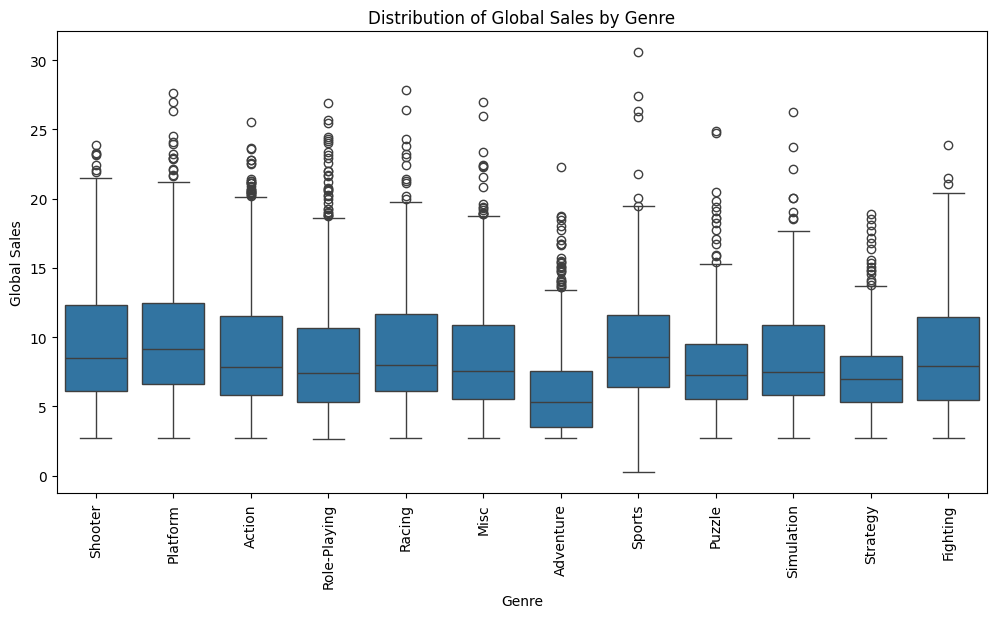

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.show()

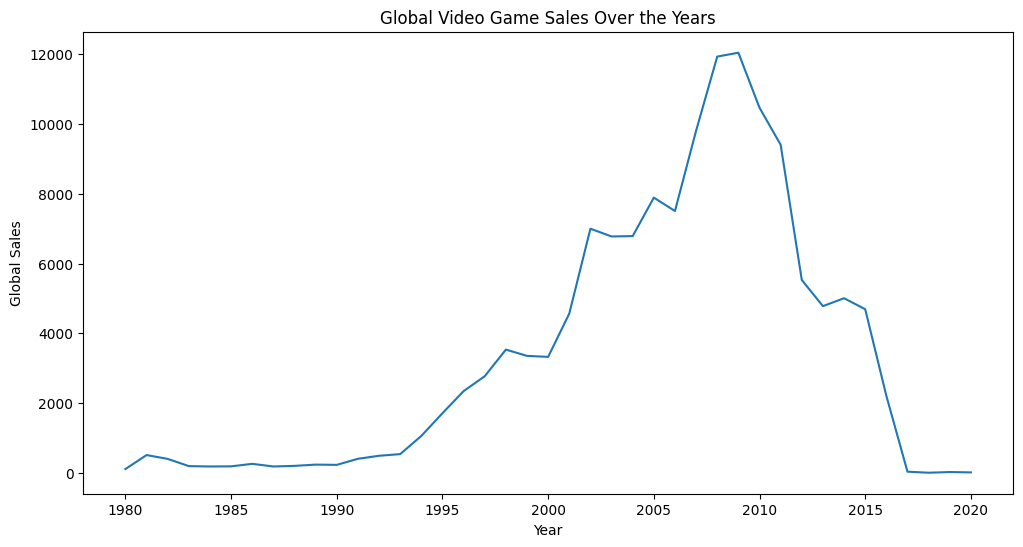

In [7]:
sales_by_year = data.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line')
plt.title('Global Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

## Examine sales performance across different platforms

### Subtask:
Group the data by platform and calculate the total global sales for each platform. Visualize the performance using a bar plot.


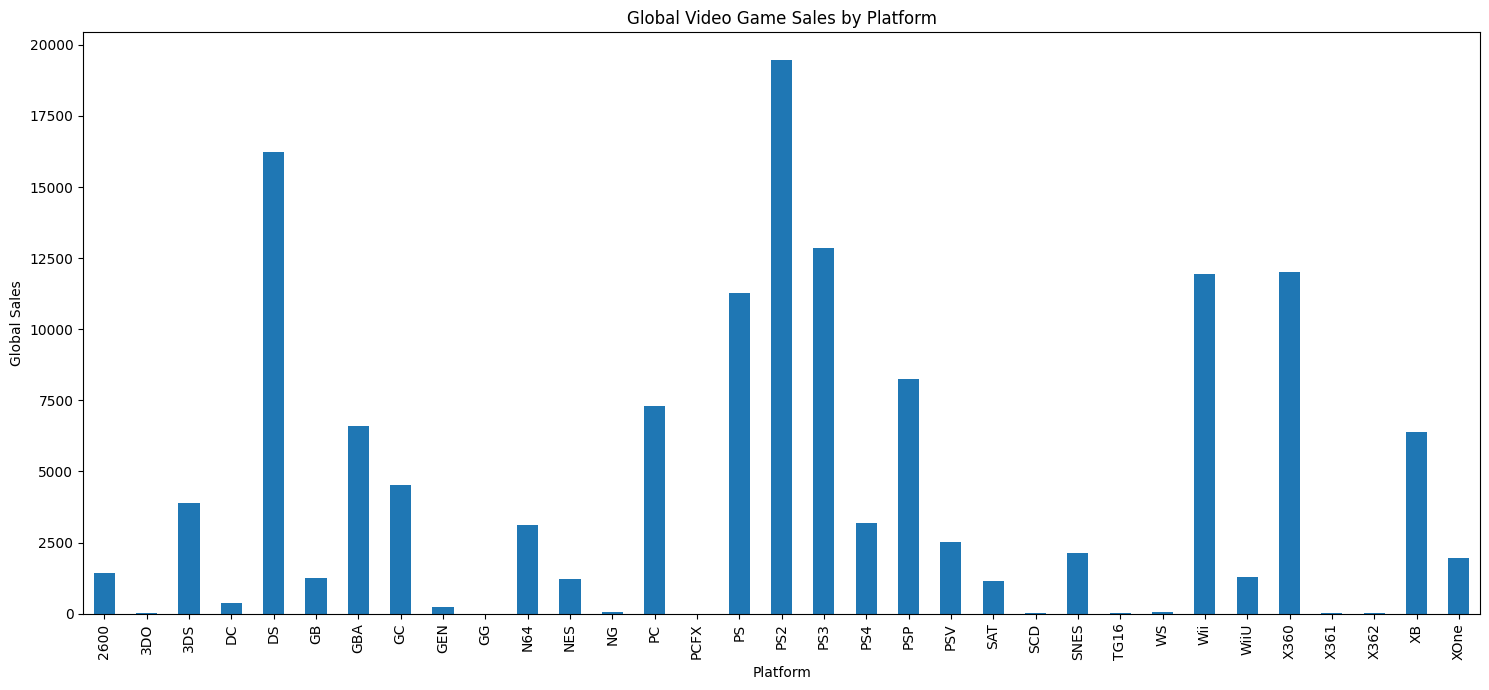

In [8]:
sales_by_platform = data.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15, 7))
sales_by_platform.plot(kind='bar')
plt.title('Global Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Examine sales performance across different regions

### Subtask:
Analyze the sales in different regions (NA, EU, JP, Other) over the years.


**Reasoning**:
Group the data by 'Year' and calculate the sum of sales for each region, then plot the regional sales over the years.



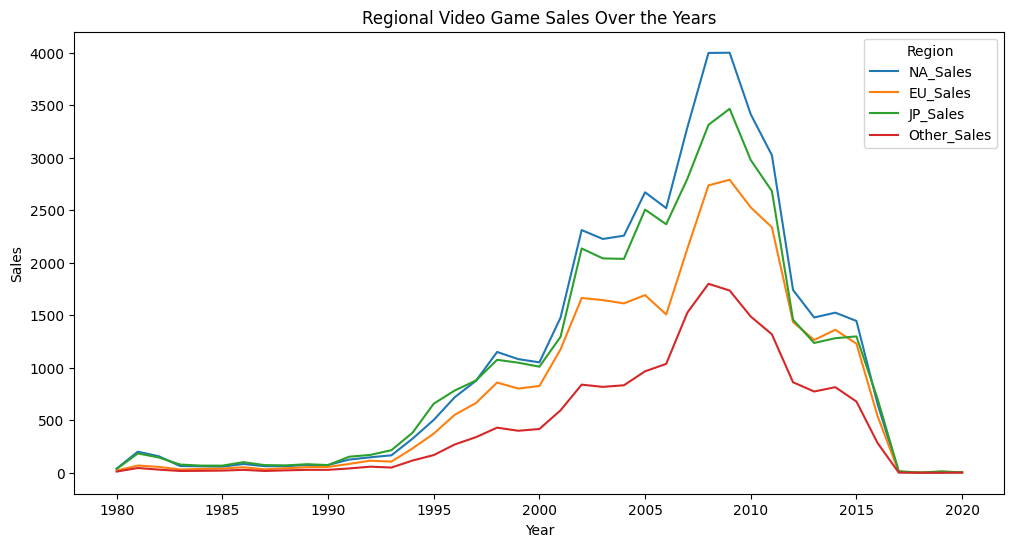

In [9]:
regional_sales_by_year = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(12, 6))
regional_sales_by_year.plot(kind='line', ax=plt.gca())
plt.title('Regional Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.show()

## Investigate the impact of publishers on global sales

### Subtask:
Group the data by publisher and calculate the total global sales for each publisher. Identify the top publishers.


**Reasoning**:
Group the data by publisher, calculate the total global sales, sort in descending order, select the top 10, and print the result.



In [10]:
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False).head(10)
print("Top 10 Publishers by Global Sales:")
print(top_publishers)

Top 10 Publishers by Global Sales:
Publisher
Electronic Arts                 14261.339604
Activision                       9566.816314
Nintendo                         9034.931204
Ubisoft                          8331.007762
Sony Computer Entertainment      7142.847859
THQ                              6797.681437
Namco Bandai Games               6674.475762
Konami Digital Entertainment     6447.567589
Sega                             5331.431162
Take-Two Interactive             4126.069458
Name: Global_Sales, dtype: float64


## Identify top-selling games and their characteristics

### Subtask:
Sort the data by global sales to identify the top-selling games and analyze their characteristics (genre, platform, year, publisher).


**Reasoning**:
Sort the data by global sales and select the top 10 rows to identify the top-selling games and their characteristics.



In [11]:
top_selling_games = data.sort_values(by='Global_Sales', ascending=False).head(10)
print("Top 10 Selling Games:")
display(top_selling_games)

Top 10 Selling Games:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15934,1,Wii Sports,Wii,2006.0,Sports,Nintendo,8.725452,8.367985,6.327075,7.135349,30.555862
7895,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,7.763170,7.555676,6.332366,6.196948,27.848159
9609,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,7.431857,7.222459,6.871802,6.064711,27.590829
15936,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,7.756840,7.398804,6.187843,6.085189,27.428677
9612,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,7.680336,6.954445,6.547563,5.815365,26.997709
15932,8,Wii Play,Wii,2006.0,Misc,Nintendo,7.641198,7.219203,6.075002,6.047319,26.982723
10583,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,7.422144,7.184927,7.324347,5.000000,26.931418
7894,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,7.283402,7.024193,6.418277,5.652325,26.378198
15926,14,Wii Fit,Wii,2007.0,Sports,Nintendo,7.190536,7.083185,6.280934,5.765468,26.320122
13448,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,8.370051,6.275363,6.918392,4.738635,26.302441
